In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

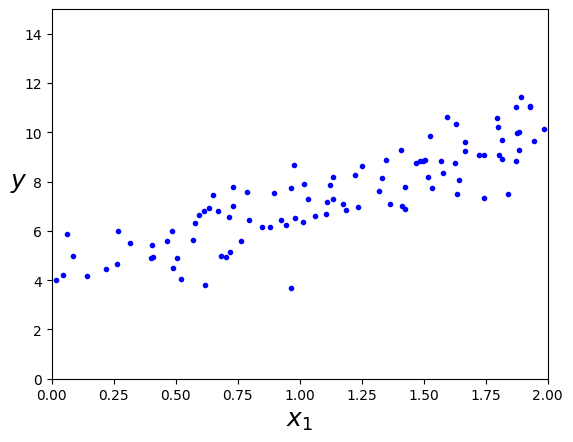

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.0635775 ],
       [2.99273942]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.0635775 ],
       [10.04905634]])

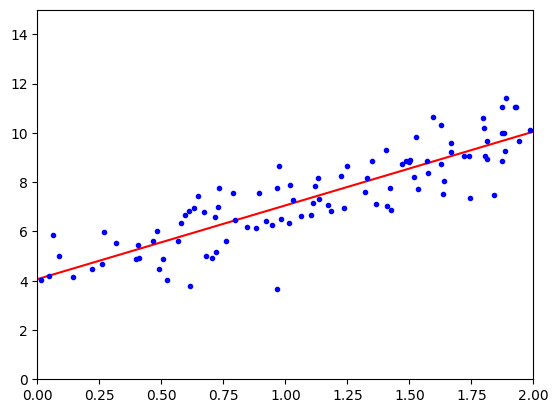

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.94865672]), array([[2.98876495]]))

In [9]:
lin_reg.predict(X_new)

array([[3.94865672],
       [9.92618662]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.94865672],
       [2.98876495]])

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[3.94865672],
       [2.98876495]])

In [12]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.94865672],
       [2.98876495]])

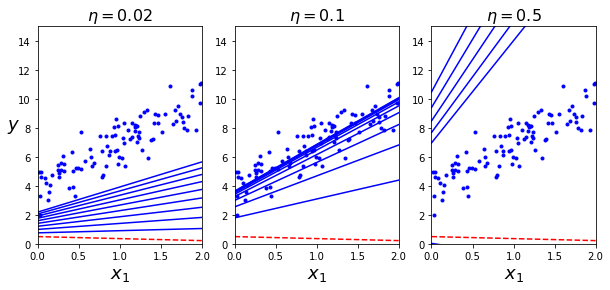

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [15]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[3.95501019],
       [3.00019123]])

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.85711241]), array([2.89207243]))

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

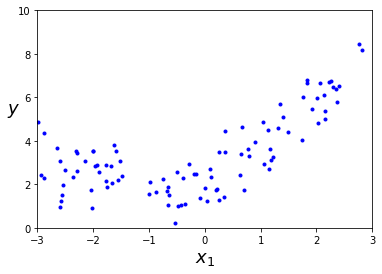

In [20]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.15290063])

In [22]:
X_poly[0]

array([2.15290063, 4.63498111])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.28405711]), array([[0.88171323, 0.44446033]]))

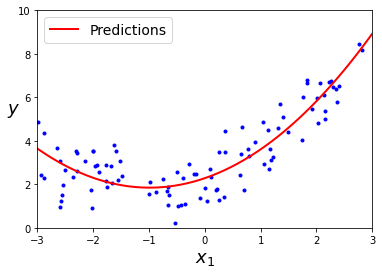

In [24]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)     

(0.0, 80.0, 0.0, 3.0)

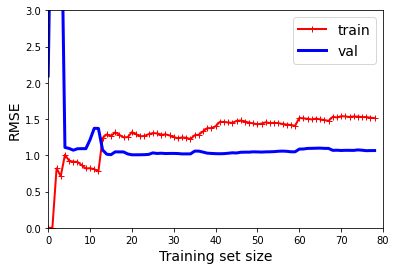

In [29]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)
plt.axis([0, 80, 0, 3])   


(0.0, 80.0, 0.0, 3.0)

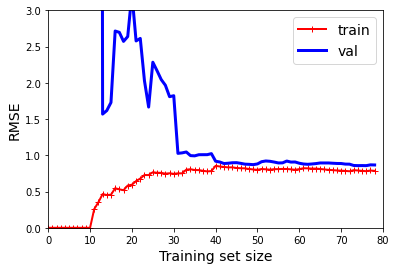

In [32]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curve(polynomial_regression, X, y)
plt.axis([0,80,0,3])

In [33]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.66784461]])

In [35]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.63778093])

In [13]:
#from sklearn.base import clone


from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import numpy as np

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # petal length + petal width
y = iris["target"]

# Add bias term for each instance
X_with_bias = np.c_[np.ones([len(X), 1]), X]
np.random.seed(2042)

test_ratio = 0.2
val_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(test_ratio * total_size)
val_size = int(val_ratio * total_size)
train_size = total_size - test_size - val_size

(total_size, train_size, test_size, val_size)

rnd_indices = np.random.permutation(total_size)
X_train = X_with_bias[rnd_indices[:train_size]]
X_val = X_with_bias[rnd_indices[train_size:-val_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_train = y[rnd_indices[:train_size]]
y_val = y[rnd_indices[train_size:-val_size]]
y_test = y[rnd_indices[-test_size:]]

In [14]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

y_train[:10]


array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [15]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [16]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums


In [18]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [19]:
(n_inputs, n_outputs)

(3, 3)

In [142]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1

Theta = np.random.randn(n_inputs, n_outputs)

best_loss = np.infty

In [143]:
y_train_1hot = to_one_hot(y_train)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)

    error = Y_proba - y_train_1hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - (eta * gradients)

    logits = X_val.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(to_one_hot(y_val) * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    print(loss)

    if loss < best_loss:
        best_loss = loss
    else:
        print("Early stopping at ", loss)
        break



2.9394850298186355
2.849498714216397
2.7606100221068717
2.672895995962191
2.5864403310194013
2.501333671630159
2.4176737905652432
2.3355656227133763
2.2551211232246717
2.176458920488515
2.099703736400811
2.0249855498035676
1.9524384829947223
1.8821993947171154
1.8144061649690004
1.7491956568744418
1.6867013396406136
1.6270505573319372
1.5703614361213223
1.5167394446448577
1.46627366427649
1.4190328908530094
1.3750617715222457
1.334377265366085
1.2969657813077369
1.2627813656342681
1.2317452642180997
1.2037470662533372
1.1786474623806111
1.156282453971715
1.1364686741475696
1.1190093620223698
1.1037004906343157
1.090336585894654
1.0787158704414872
1.0686444945467983
1.0599397478996155
1.052432259555213
1.0459672766597068
1.0404051629180662
1.0356212788605417
1.0315054048289303
1.027960852050258
1.0249033840742814
1.0222600454307367
1.0199679700415198
1.0179732206122538
1.0162296927139303
1.0146981036028064
1.0133450756543336
1.012142317055502
1.0110658975177873
1.0100956136875339
1.0092

In [144]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333